In [1]:

import findspark
findspark.init()

from pyspark.sql import SparkSession
import pandas as pd
import plotly.express as px
import plotly.io as pio
import numpy as np

np.random.seed(42)

pio.renderers.default = "notebook"

# Initialize Spark Session
spark = SparkSession.builder.appName("LightcastData").getOrCreate()

# Load Data
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("./data/lightcast_job_postings.csv")

# Show Schema and Sample Data
print("---This is Diagnostic check, No need to print it in the final doc---")

df.printSchema() # comment this line when rendering the submission
df.show(5)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/26 01:28:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/06/26 01:28:14 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


---This is Diagnostic check, No need to print it in the final doc---
root
 |-- ID: string (nullable = true)
 |-- LAST_UPDATED_DATE: string (nullable = true)
 |-- LAST_UPDATED_TIMESTAMP: timestamp (nullable = true)
 |-- DUPLICATES: integer (nullable = true)
 |-- POSTED: string (nullable = true)
 |-- EXPIRED: string (nullable = true)
 |-- DURATION: integer (nullable = true)
 |-- SOURCE_TYPES: string (nullable = true)
 |-- SOURCES: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- ACTIVE_URLS: string (nullable = true)
 |-- ACTIVE_SOURCES_INFO: string (nullable = true)
 |-- TITLE_RAW: string (nullable = true)
 |-- BODY: string (nullable = true)
 |-- MODELED_EXPIRED: string (nullable = true)
 |-- MODELED_DURATION: integer (nullable = true)
 |-- COMPANY: integer (nullable = true)
 |-- COMPANY_NAME: string (nullable = true)
 |-- COMPANY_RAW: string (nullable = true)
 |-- COMPANY_IS_STAFFING: boolean (nullable = true)
 |-- EDUCATION_LEVELS: string (nullable = true)
 |-- EDUCATIO

25/06/26 01:28:29 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+-----------------+----------------------+----------+--------+---------+--------+--------------------+--------------------+--------------------+-----------+-------------------+--------------------+--------------------+---------------+----------------+--------+--------------------+-----------+-------------------+----------------+---------------------+-------------+-------------------+-------------+------------------+---------------+--------------------+--------------------+--------------------+-------------+------+-----------+----------------+-------------------+---------+-----------+--------------------+--------------------+-------------+------+--------------+-----+--------------------+-----+----------+---------------+--------------------+---------------+--------------------+------------+--------------------+------------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+------

In [2]:

df.createOrReplaceTempView("jobs")

In [3]:
skill_counts_by_type = spark.sql("""
    SELECT software_skills_name, COUNT(*) AS count
    FROM jobs
    WHERE LOWER(title_name) LIKE '%analyst%'
    GROUP BY software_skills_name
    ORDER BY count DESC
    LIMIT 10
""")
skill_counts_by_type.show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|software_skills_name                                                                                                                                                                                                                                            |count|
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|[]                                                                                                                                                                                                          

In [4]:
skill_counts_by_type = spark.sql("""
    SELECT skills_name, COUNT(*) AS count
    FROM jobs
    WHERE LOWER(title_name) LIKE '%analyst%'
    GROUP BY skills_name
    ORDER BY count DESC
    LIMIT 10
""")
skill_counts_by_type.show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|skills_name                                                       

In [13]:
import pandas as pd

skills_data = {
    "Name": ["Alyssa", "Adam", "Yihan"],
    "Dashboard": [5, 3, 4],
    "SQL": [4, 2, 5],
    "Data Analysis": [3, 1, 4],
    "Cloud Computing": [2, 2, 3]
}

df_skills = pd.DataFrame(skills_data)
df_skills.set_index("Name", inplace=True)
df_skills

,Dashboard,SQL,Data Analysis,Cloud Computing
Name,,,,
Alyssa,5,4,3,2
Adam,3,2,1,2
Yihan,4,5,4,3


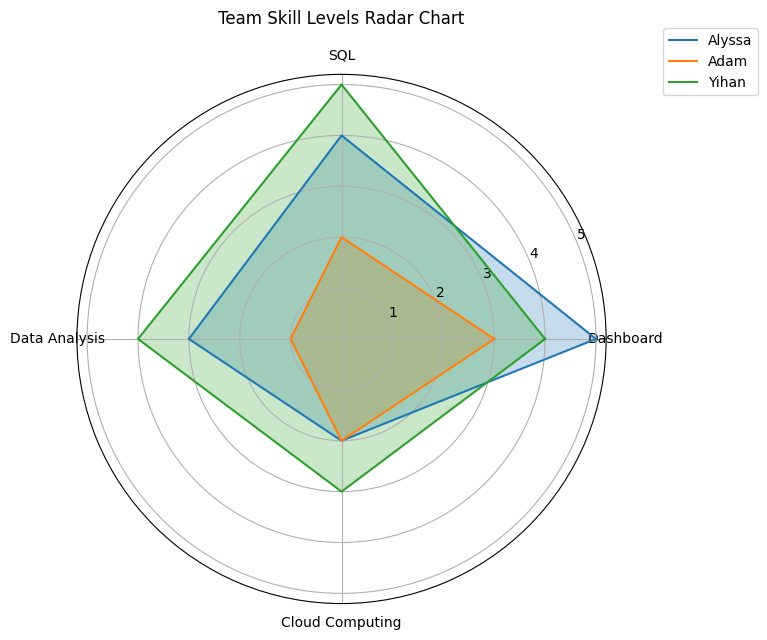

In [19]:
df_skills = pd.DataFrame(skills_data)
df_skills.set_index("Name", inplace=True)

# Get list of skills (columns)
skills = df_skills.columns.tolist()
N = len(skills)

# Set up angles for radar
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Create radar chart for each person
plt.figure(figsize=(8, 8))

for name in df_skills.index:
    values = df_skills.loc[name].tolist()
    values += values[:1]  # close the loop

    ax = plt.subplot(1, 1, 1, polar=True)
    ax.plot(angles, values, label=name)
    ax.fill(angles, values, alpha=0.25)

# Customize axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(skills)
plt.title("Team Skill Levels Radar Chart", y=1.08)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()